<br/>

<div align="right">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Grupo_Sura_logo.svg/1280px-Grupo_Sura_logo.svg.png" width="250"/>
  $\qquad\qquad$
  <img src="https://radcolombia.org/web/sites/default/files/archivos/instituciones/universidad-norte/logo-uninorte.png" width="250"/>
</div>

# $\large{Reto\ \color{red}{Data\ Challenge}\ \text{PRO 2025-10}}$

Nombre(s):
- **David Jesús Roa Aníbal**
- **Dariana Sanguino Cuello**
- **Abrahan Elias Basto Martinez**

---

## **Contexto**
Fundado en Medellín en el año 1944 bajo el nombre **Compañía Suramericana de Seguros Generales**, se dedicó a la actividad aseguradora en Colombia. Con aproximadamente 5.3 millones de afiliados, ocupando una gran parte del mercado de aseguradoras colombianas, se encuentran hoy en día bajo el nombre **Grupo de Inversiones Suramericana** o mayormente conocidos como **Grupo SURA**.

En el marco del **Data Challenge** propuesto por la **ARL SURA**, se plantea una problemática crítica y de alta relevancia para el sistema de salud laboral colombiano: la previsión de la demanda de servicios en los municipios del país. **ARL SURA**, una de las Administradoras de Riesgos Laborales más importantes de Colombia, tiene como misión proteger y acompañar a los trabajadores en la prevención, atención y rehabilitación de accidentes y enfermedades laborales. En este contexto, anticipar cuándo, dónde y cuántos servicios serán necesarios no es solo una cuestión de eficiencia logística, sino de impacto directo en la vida de las personas.

El reto se enfoca en desarrollar una solución predictiva robusta, capaz de identificar patrones complejos en los datos históricos de atención registrados entre enero de 2019 y diciembre de 2024. La naturaleza urgente, a veces impredecible, de estos eventos exige enfoques que vayan más allá de los métodos tradicionales. Nuestra propuesta combina técnicas de análisis de series temporales, aprendizaje automático y visualización avanzada para construir un modelo de previsión capaz de adaptarse a la variabilidad de los entornos municipales y responder con precisión ante escenarios cambiantes.

El enfoque no se limita a obtener un buen puntaje en precisión: apunta a construir una herramienta útil, interpretable y accionable para la toma de decisiones. ***Porque en salud laboral, predecir no es solo anticiparse, es cuidar mejor.***

## Carga inicial de datos

Teniendo en cuenta que en Google Drive contamos con la carpeta de los datos, importamos la librería correspondiente para utilizar con Google Colab. Sin embargo, se puede evitar este paso si se ejecuta en local.

In [ ]:
# Utilizamos Google Drive para mantener y cargar el archivo de información de salud (4GB)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se hace la verificación de que haya cargado correctamente los datos mostrando los archivos dentro de la carpeta.

In [ ]:
# Comprobamos que se haya cargado y se encuentre el archivo
!ls "drive/MyDrive/Diccionario de datos UNINORTE/"

'1.Informacion Salud 2019-2024.txt'  'Diccionario de datos UNINORTE.xlsx'
'2.Red Prestadores.xlsx'


Se hace uso de la librería Pandas para cargar todo el dataset (4GB de datos) con la información de los casos entre enero 2019 a diciembre 2024.

In [ ]:
import pandas as pd

# Cargamos toda la información de salud suministrada por SURA
df = pd.read_csv('drive/MyDrive/Diccionario de datos UNINORTE/1.Informacion Salud 2019-2024.txt', sep='|')

<ipython-input-4-6f38abb6a124>:4: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('drive/MyDrive/Diccionario de datos UNINORTE/1.Informacion Salud 2019-2024.txt', sep='|')


Luego de esto, también se cuenta con la información de afiliados por municipio, lo cual sirve para analizar la información sobre demanda al mismo tiempo.

In [ ]:
# Cargamos información acerca de afiliados por municipio
df_afiliados = pd.read_csv('drive/MyDrive/Diccionario de datos UNINORTE/Afiliados.txt')

In [ ]:
df.head(3)

,Nombre_Oficina_Arp,Numero_Uen_Arp,Siniestro_Arp_Id,Nombre_Sinies_Diagnosti_Princi,Siniestro_Diagnosti_Princi_Id,Nombre_Tipo_Atencion_Arp,DNI_IPS,Nombre_IPS,Nombre_Municipio_IPS,Nombre_Departamento_IPS,...,TIPIFICACION,TIPO_CITA,Dias_IT,AÑO,PERIODO,Cantidad,Geogra_Municipio_Id,Total_Registros,MUNICIPIO,HOMOLOGACION NIT
0,OFICINA BOGOTA,419,bf0bf0c0e3,G560,G560,AMBULATORIA,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,...,CITAS FRONT,?,?,2019.0,2019-07,1.0,586,1,BOGOTA,3d1546fd2b
1,OFICINA BOGOTA,411,96e0b92217,S626,S626,QUIRURGICO AMBULATORIO,5708b4378b,905d8f470c,MEDELLIN,ANTIOQUIA,...,CITAS BACK,C,?,2019.0,2019-06,2.0,586,1,BOGOTA,3d1546fd2b
2,OFICINA BOGOTA,414,47999f6929,S835,S835,QUIRURGICO AMBULATORIO,541c0565f5,1ee303f2d8,BOGOTA,BOGOTA D.C.,...,CITAS BACK,C,?,2019.0,2019-03,1.0,586,1,BOGOTA,465b9adf14


In [ ]:
df_afiliados.head(3)

,Cod_Departamento_Municipio,Codigo_Departamento_Dane_Op,Nombre_Departamento,Geogra_Municipio_Id,Codigo_Divipola_Op,Codigo_Geogra_Munici_Dane_Op,Geogra_Municipio_Desc,Total_Afiliados,Tipo_Municipio,Codigo_Concepto,Concepto_Desc
0,15/4727,BOYACA/PAIPA,BOYACA,4727,1551600,51600,PAIPA,1472,Peque o m s de 100 afiliados,32.0,CONSULTA ORTOPEDISTA
1,05/1510,ANTIOQUIA/DABEIBA,ANTIOQUIA,1510,523400,23400,DABEIBA,471,Peque o m s de 100 afiliados,32.0,CONSULTA ORTOPEDISTA
2,76/7242,VALLE DEL CAUCA/YUMBO,VALLE DEL CAUCA,7242,7689200,89200,YUMBO,43799,Grande,42.0,CIRUG A NEUROCIRUG A


## Interpretando fechas
Antes de continuar con el análisis, se hará una pequeña limpieza de datos al darle formato a las fechas.

In [ ]:
# Convertir la columna a datetime
df['FECHA_PROCESO'] = pd.to_datetime(
    df['FECHA_PROCESO'],
    errors='coerce' # Convierte errores a NaT (valores nulos)
)

print("Valores nulos en fechas", df['FECHA_PROCESO'].isnull().sum())

Valores nulos en fechas 6


<ipython-input-8-eb0e836e6731>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA_PROCESO'] = pd.to_datetime(


La información que contenga fechas nulas debe ser filtrada. Sin embargo, a este punto las fechas en los datos (guardadas en la columna FECHA_PROCESO) ya están convertidas para su tratamiento. Las fechas nulas o inválidas por defecto se convierten a 1900-01-01, por lo que un simple filtro de fecha para darle inicio y fin (enero 2019 a diciembre 2024), limpiaría de forma efectiva los datos.

In [ ]:
# Filtrar fechas >= 2019
fecha_corte = pd.to_datetime('2019-01-01')
df = df[df['FECHA_PROCESO'] >= fecha_corte].copy()

# Filtrar fechas <= 2024
fecha_fin = pd.to_datetime('2024-12-31')
df = df[df['FECHA_PROCESO'] <= fecha_fin].copy()

## Exploración de datos
Como punto de partida con el análisis y exploración de los datos que están a disposición, se harán ciertos cálculos y gráficas que ayudarán a entender los resultados y la elección del mejor modelo para su predicción.

In [ ]:
# Información de casos
print('Casos', df.shape)

# Información de afiliados
print('Afiliados', df_afiliados.shape)

Casos (11688862, 42)
Afiliados (11646, 11)


Se observa que se cuenta con un total de 11.716.416 datos de casos en los últimos 5 años y 11.646 datos sobre afiliados y conceptos de factura por municipio.

Ya que los datos suministrados sobre afiliados repite la información por municipio y el concepto de cada caso, por fines prácticos se eliminarán los casos dejando un único municipio en los datos y así poder calcular el total de afiliados.

In [ ]:
df_af = df_afiliados.drop_duplicates('Cod_Departamento_Municipio')
df_af['Total_Afiliados'].sum()

np.int64(5235960)

Por lo que podemos corroborar, hay un aproximado de **5.236.000 de afiliados** en total, calculado por la suma del total de afiliados por municipio.

Posteriormente, se evidencia cuáles son las 15 principales ciudades teniendo en cuenta la cantidad de afiliados.

,Total_Afiliados
Codigo_Departamento_Dane_Op,
BOGOTA D.C./BOGOTA,1352014
ANTIOQUIA/MEDELLIN,772418
VALLE DEL CAUCA/SANTIAGO DE CALI,395375
ATLANTICO/BARRANQUILLA,262403
BOLIVAR/CARTAGENA DE INDIAS,152937
SANTANDER/BUCARAMANGA,144036
RISARALDA/PEREIRA,82517
CALDAS/MANIZALES,69672
NORTE DE SANTANDER/CUCUTA,65505


Text(0.5, 1.0, 'Top 15 Municipios por Total de Afiliados')

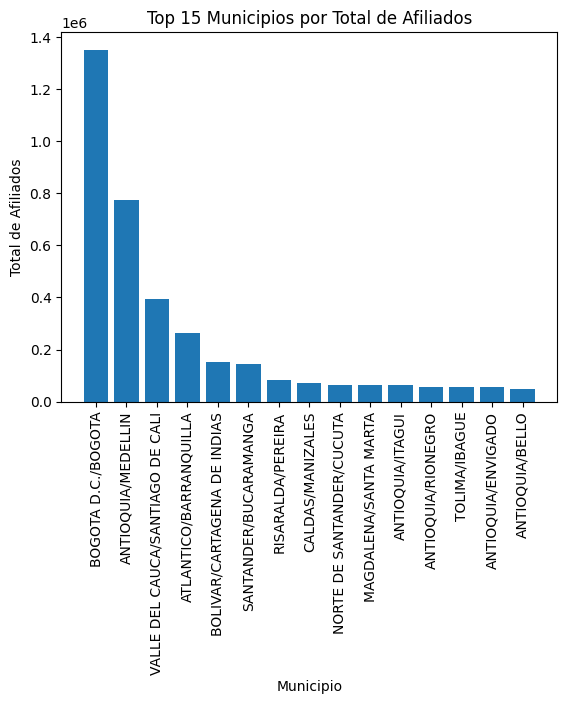

In [ ]:
import matplotlib.pyplot as plt

top_afiliados = df_af.groupby('Codigo_Departamento_Dane_Op')['Total_Afiliados'].sum().nlargest(15)

display(top_afiliados)

plt.bar(top_afiliados.index, top_afiliados.values)
plt.xticks(rotation=90)
plt.xlabel('Municipio')
plt.ylabel('Total de Afiliados')
plt.title('Top 15 Municipios por Total de Afiliados')

Los resultados, graficados y representados en una tabla, determinan que Bogotá (siendo la capital del país) tiene la mayor cantidad de afiliados, seguido de Medellín, Santiago de Cali y Barranquilla.

In [ ]:
# Agregamos un campo para categorizar el diagnóstico con el concepto
df['FacturaSiniestro'] = df['Siniestro_Diagnosti_Princi_Id'].astype(str) + ' ' + df['Concepto_Factura_Desc'].astype(str)

También, se extraerán los 10 diagnósticos o siniestros más frecuentes en general. Y se graficará alguno en base al tiempo de forma general.

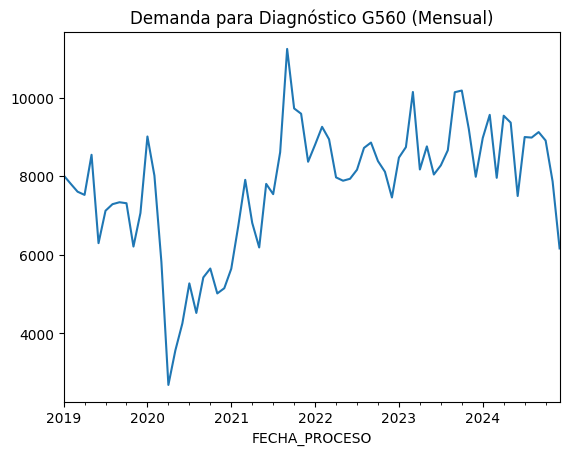

In [ ]:
import plotly.express as px

# Diagnósticos más frecuentes
top_diagnosticos = df['Siniestro_Diagnosti_Princi_Id'].value_counts().nlargest(10)
fig = px.bar(top_diagnosticos, title='Top 10 Diagnósticos Principales')
fig.update_layout(xaxis_title='Diagnóstico', yaxis_title='Conteo')
fig.show()

# Diagnóstico vs Tiempo
diagnostico_ejemplo = 'G560'

ts_diag = df[df['Siniestro_Diagnosti_Princi_Id'] == diagnostico_ejemplo].set_index('FECHA_PROCESO').resample('ME').size()
ts_diag.plot(title=f'Demanda para Diagnóstico {diagnostico_ejemplo} (Mensual)');

Teniendo en cuenta los municipios con más afiliados, se puede filtrar entre la información de casos de los últimos 5 años para tener en cuenta cuál fue el diagnóstico más común en cada municipio por este lapso de tiempo.

In [ ]:
# Para los primeros 5 municipios, se filtra y agrupa por siniestro y concepto para su conteo
for municipio in top_afiliados.index[:5]:
  mun = municipio.split('/')[1]
  print(mun)
  display(df[df['MUNICIPIO'] == mun].groupby('FacturaSiniestro').size().nlargest(10))

BOGOTA


,0
FacturaSiniestro,
G560 MEDICAMENTOS AMBULATORIOS,62394
G560 MSI -MEDICO SEGUIMIENTO INTEGRAL,54288
G560 SESIONES DE FISIOTERAPIA,51542
M751 SESIONES DE FISIOTERAPIA,33321
M751 MEDICAMENTOS AMBULATORIOS,29007
M751 MSI -MEDICO SEGUIMIENTO INTEGRAL,25036
U072 ATENCION VIRTUAL COVID_19,19413
G560 CONSULTA FISIATRIA,19028
S610 CALIFICACIÓN DE ORIGEN AT,18398


MEDELLIN


,0
FacturaSiniestro,
U072 ATENCION VIRTUAL COVID_19,29484
G560 MSI -MEDICO SEGUIMIENTO INTEGRAL,15920
G560 MEDICAMENTOS AMBULATORIOS,13573
U072 TELEORIENTACION EN SALUD,11531
M545 MEDICAMENTOS AMBULATORIOS,11022
S800 MEDICAMENTOS AMBULATORIOS,10455
U071 ATENCION VIRTUAL COVID_19,10080
S610 CALIFICACIÓN DE ORIGEN AT,9801
U072 CALIFICACION DE ORIGEN EL,9759


SANTIAGO DE CALI


,0
FacturaSiniestro,
G560 MSI -MEDICO SEGUIMIENTO INTEGRAL,15696
G560 MEDICAMENTOS AMBULATORIOS,14878
U071 TELEORIENTACION EN SALUD,11502
M751 MEDICAMENTOS AMBULATORIOS,8827
M751 MSI -MEDICO SEGUIMIENTO INTEGRAL,8695
U072 ATENCION VIRTUAL COVID_19,7363
U071 ATENCION VIRTUAL COVID_19,5979
U071 CALIFICACION DE ORIGEN EL,5417
G560 CONSULTA MSI TELEMEDICINA (L),4671


BARRANQUILLA


,0
FacturaSiniestro,
G560 MEDICAMENTOS AMBULATORIOS,11739
G560 MSI -MEDICO SEGUIMIENTO INTEGRAL,10731
M511 MEDICAMENTOS AMBULATORIOS,7842
U071 TELEORIENTACION EN SALUD,6329
U072 ATENCION VIRTUAL COVID_19,6264
M511 MSI -MEDICO SEGUIMIENTO INTEGRAL,5352
U071 CALIFICACION DE ORIGEN EL,4566
T149 CALIFICACIÓN DE ORIGEN AT,4384
G560 SESIONES DE FISIOTERAPIA,4081


CARTAGENA DE INDIAS


,0
FacturaSiniestro,
G560 MEDICAMENTOS AMBULATORIOS,6452
G560 MSI -MEDICO SEGUIMIENTO INTEGRAL,5936
U071 TELEORIENTACION EN SALUD,3090
G560 SESIONES DE FISIOTERAPIA,2336
M511 MEDICAMENTOS AMBULATORIOS,2310
S610 CALIFICACIÓN DE ORIGEN AT,2268
U072 ATENCION VIRTUAL COVID_19,2256
M545 MEDICAMENTOS AMBULATORIOS,1998
U071 CALIFICACION DE ORIGEN EL,1998


Se puede observar una gran cantidad de casos con identificación **G560** que según la clasificación CIE-10 corresponde a **Síndrome del túnel carpiano**, siendo este un factor común en los municipios listados. Además, en cada una de estos municipios se encuentran casos con **U072** y **U071** que corresponden a incidentes con el **COVID-19**.

Así mismo, se puede realizar un listado de las 10 ciudades con más demanda (más casos) y también, filtrar por el tipo de caso y crear una gráfica acerca de este.

In [ ]:
# Casos por municipio (Top 10)
top_municipios = df['MUNICIPIO'].value_counts().nlargest(10).to_frame(name='Eventos')
display(top_municipios)

,Eventos
MUNICIPIO,
BOGOTA,2491894
MEDELLIN,1556542
SANTIAGO DE CALI,738702
BARRANQUILLA,537940
CARTAGENA DE INDIAS,301536
BUCARAMANGA,275897
ITAGUI,192197
CUCUTA,144190
PEREIRA-RISARALDA,137179


Además, se puede observar cuándo y en dónde hubieron más casos filtrando por estos valores. De ejemplo se usará Barranquilla como municipio y el siniestro *G560 MEDICAMENTOS AMBULATORIOS* y también, *U072 ATENCION VIRTUAL COVID_19* que está relacionado con el COVID-19.

<ipython-input-17-94231e69d47a>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Axes: title={'center': 'Demanda en BARRANQUILLA por Síndrome del túnel carpiano (Mensual)'}, xlabel='FECHA_PROCESO'>

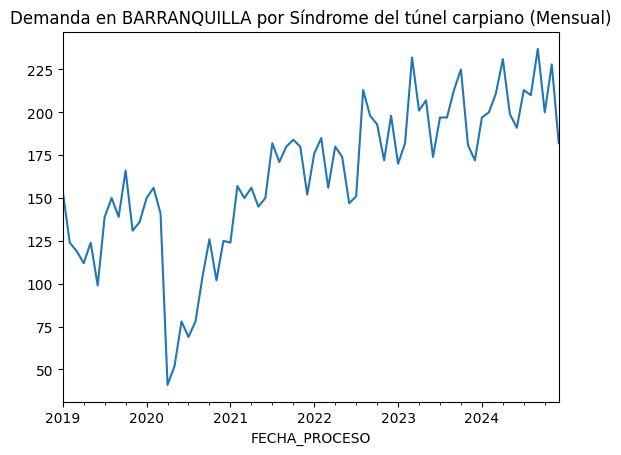

In [ ]:
# Serie temporal por municipio
municipio_ejemplo = 'BARRANQUILLA'
siniestro_ejemplo = 'G560 MEDICAMENTOS AMBULATORIOS'

ts_municipio = df[df['MUNICIPIO'] == municipio_ejemplo][df['FacturaSiniestro'] == siniestro_ejemplo].set_index('FECHA_PROCESO').resample('ME').size()
ts_municipio.plot(title=f'Demanda en {municipio_ejemplo} por Síndrome del túnel carpiano (Mensual)')

<ipython-input-18-51fd3418e6b9>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



<Axes: title={'center': 'Demanda en BARRANQUILLA por COVID-19 (Mensual)'}, xlabel='FECHA_PROCESO'>

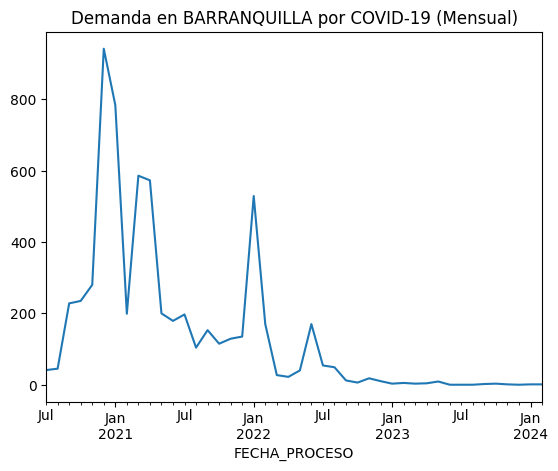

In [ ]:
# COVID-19
municipio_ejemplo = 'BARRANQUILLA'
siniestro_ejemplo = 'U072 ATENCION VIRTUAL COVID_19'

ts_municipio = df[df['MUNICIPIO'] == municipio_ejemplo][df['FacturaSiniestro'] == siniestro_ejemplo].set_index('FECHA_PROCESO').resample('ME').size()
ts_municipio.plot(title=f'Demanda en {municipio_ejemplo} por COVID-19 (Mensual)')

Se pueden evidenciar los picos por los brotes pandémicos del virus COVID-19. Teniendo en cuenta que el primer dato se produjo cerca de julio del año 2020 y los casos en los últimos años son cero o se acercan a cero.

Al contrastar toda la información anterior y relacionarla por diagnósticos y municipios más comunes, se puede generar un mapa de calor dando una visión general de la información extraida anteriormente.

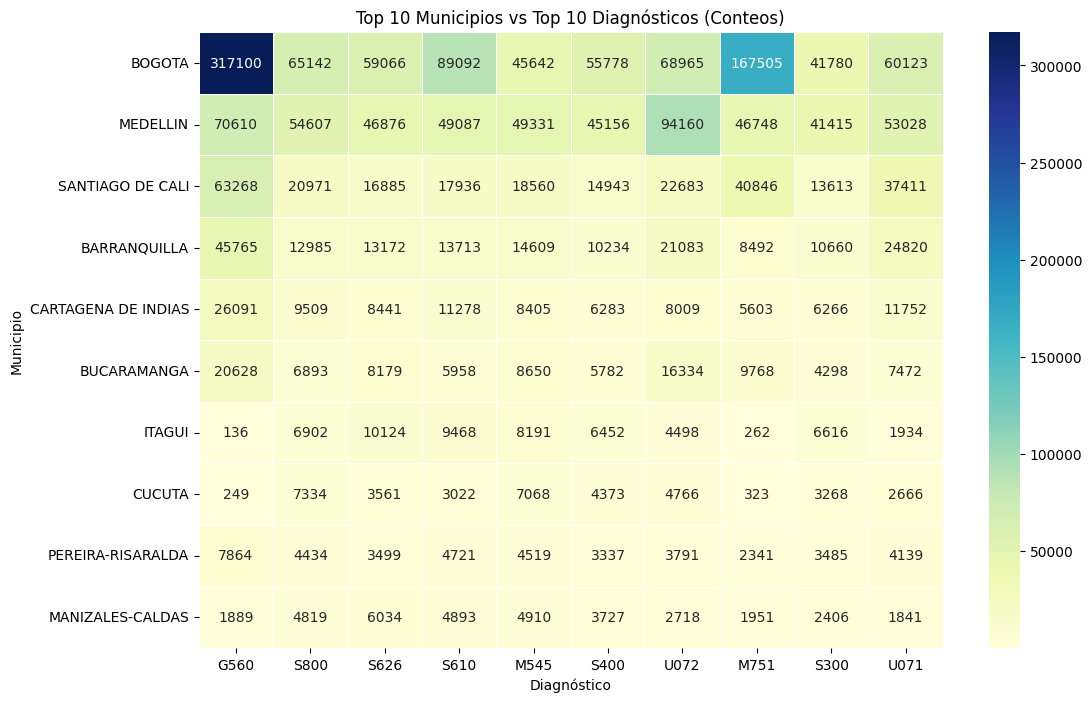

In [ ]:
import seaborn as sns

cross_table = pd.crosstab(
    index=df['MUNICIPIO'],
    columns=df['Siniestro_Diagnosti_Princi_Id']
)

# Seleccionar los 10 diagnósticos más frecuentes
top_diagnosticos = cross_table.sum().nlargest(10).index
cross_table_top = cross_table[top_diagnosticos]

# Seleccionar los 10 municipios con más eventos
top_municipios = cross_table.sum(axis=1).nlargest(10).index
cross_table_top = cross_table_top.loc[top_municipios]

# Mapa de calor [heatmap]
plt.figure(figsize=(12, 8))
sns.heatmap(cross_table_top, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Top 10 Municipios vs Top 10 Diagnósticos (Conteos)')
plt.xlabel('Diagnóstico')
plt.ylabel('Municipio')
plt.show()

## Elección de muestra

Como un análisis y al pensar en la limpieza de los datos, se puede graficar la información que tenemos para mantener una visión general.

In [ ]:
# Agregación temporal (diaria)
ts_data = df.set_index('FECHA_PROCESO').resample('D').size().to_frame(name='Total_Eventos')

# Gráfica de la serie temporal
fig = px.line(ts_data, title='Demanda Total de Servicios Médicos (Diaria)')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Número de Eventos')
fig.show()

Como se puede evidenciar, existen muchas irregularidades en estos datos ya que rebotan mucho, esto se puede ver al tener picos altos y bajos repentinamente.

Por lo que se tiene que seguir limpiando, cabe destacar que una de las formas de proseguir sin eliminar los datos, sería cambiar la muestra de forma diaria a mensual.

In [ ]:
# Agregación temporal (mensual)
ts_data = df.set_index('FECHA_PROCESO').resample('ME').size().to_frame(name='Total_Eventos')

# Gráfica de la serie temporal
fig = px.line(ts_data, title='Demanda Total de Servicios Médicos (Mensual)')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Número de Eventos')
fig.show()

Se observa una gráfica más limpia y predecible, se prosigue con información útil acerca de la estacionaridad, tendencia y residuales. **Por lo que la serie de tiempo utilizada de ahora en adelante será por lapsos de meses**.

In [ ]:
!pip install statsmodels

Descomposición estacionaria


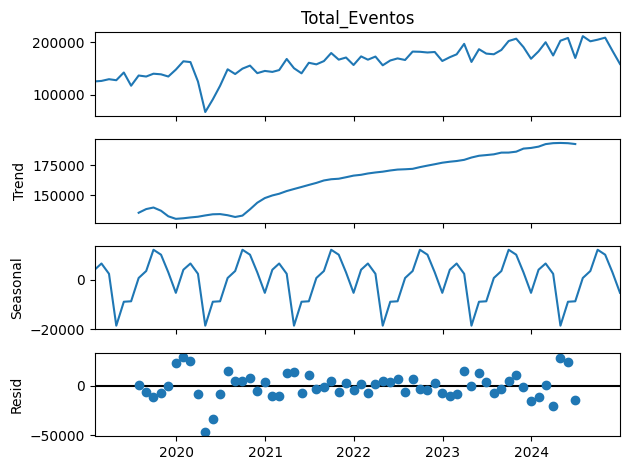

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_data['Total_Eventos'], model='additive', period=12)
decomposition.plot()
print('Descomposición estacionaria')

## Modelos de predicción
A continuación, se realizará la prueba y ejecución de algunos modelos de predicción de datos para poder elegir el que mejor se ajuste a la situación debida.

### **Gradient Boosting**

In [ ]:
!pip install lightgbm statsforecast neuralprophet

MAE en conjunto de prueba (mensual): 16351.96


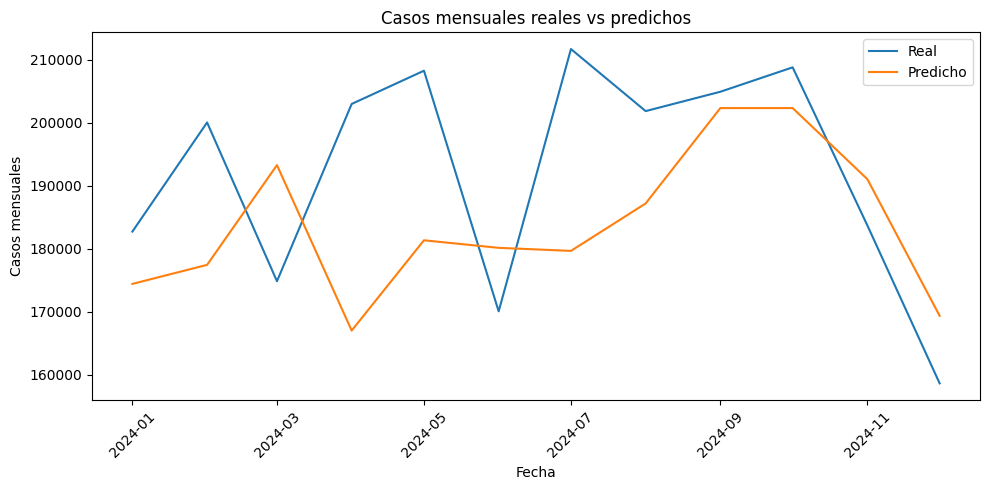

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# 3. Agrupar por mes (serie mensual)
df['year_month'] = df['FECHA_PROCESO'].dt.to_period("M")
monthly_counts = df.groupby('year_month').size().reset_index(name='y')
monthly_counts['FECHA_PROCESO'] = monthly_counts['year_month'].dt.to_timestamp()

# 4. Crear features de calendario
monthly_counts['month'] = monthly_counts['FECHA_PROCESO'].dt.month
monthly_counts['year'] = monthly_counts['FECHA_PROCESO'].dt.year

# 5. Dataset para modelo
X = monthly_counts[['month', 'year']]
y = monthly_counts['y']

# 6. División entrenamiento/prueba (últimos 12 meses como test)
split_idx = -12
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = monthly_counts['FECHA_PROCESO'].iloc[split_idx:]

# 7. Entrenar modelo
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# 8. Predicción y evaluación
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE en conjunto de prueba (mensual): {mae:.2f}")

# 9. Gráfica reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(dates_test, y_test.values, label='Real')
plt.plot(dates_test, y_pred, label='Predicho')
plt.xlabel("Fecha")
plt.ylabel("Casos mensuales")
plt.title("Casos mensuales reales vs predichos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **ARIMA**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



MAE con ARIMA: 21179.51


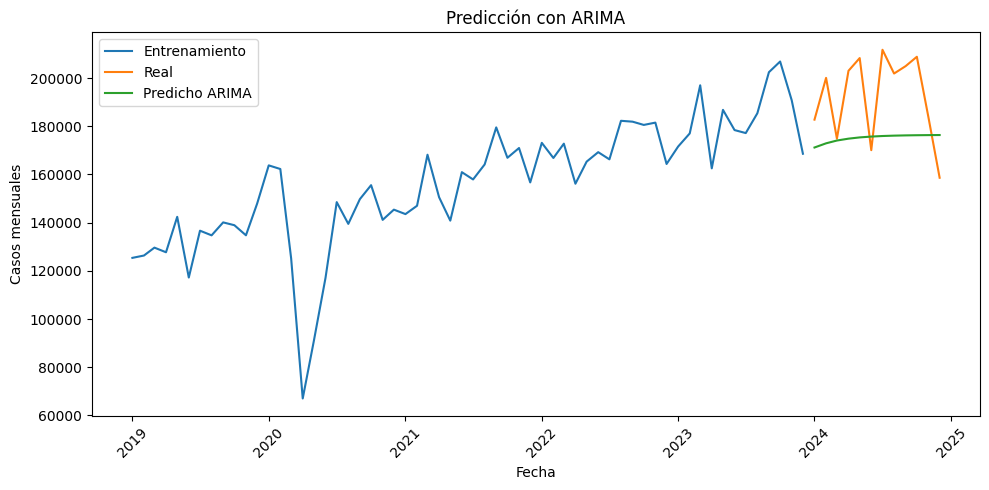

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# 3. Serie mensual
df['year_month'] = df['FECHA_PROCESO'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convertimos a datetime

# 4. División entrenamiento / prueba
train = monthly_counts.iloc[:-12]
test = monthly_counts.iloc[-12:]

# 5. Entrenar ARIMA (p, d, q) - puedes ajustar estos parámetros
model = ARIMA(train, order=(1, 1, 1))  # Modelo básico, puedes experimentar con otros valores
fitted_model = model.fit()

# 6. Predicción
forecast = fitted_model.forecast(steps=12)
mae = mean_absolute_error(test, forecast)
print(f"MAE con ARIMA: {mae:.2f}")

# 7. Gráfica de reales vs. predichos
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Predicho ARIMA')
plt.xlabel("Fecha")
plt.ylabel("Casos mensuales")
plt.title("Predicción con ARIMA")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **SARIMAX**

MAE con ARIMA: 15062.99


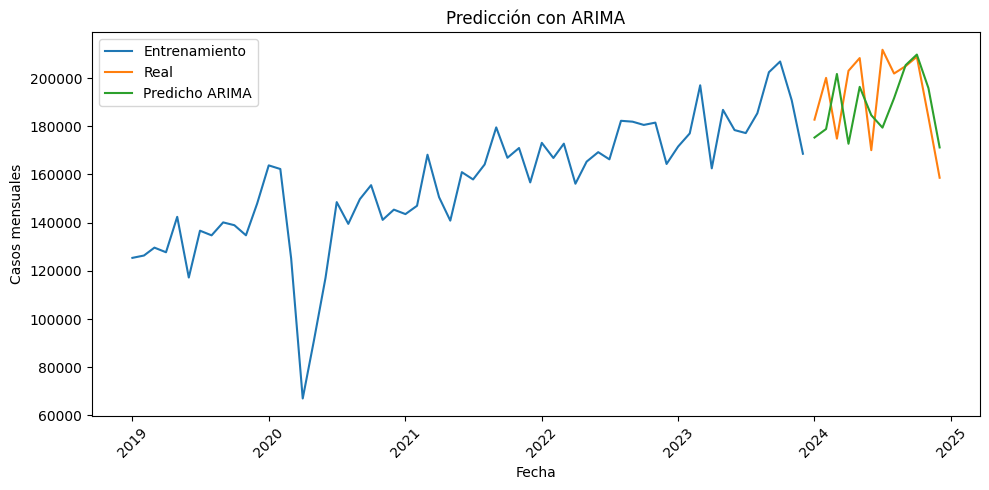

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Serie mensual
df['year_month'] = df['FECHA_PROCESO'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()
monthly_counts.index = monthly_counts.index.to_timestamp()  # Convertimos a datetime

# División de datos para entrenamiento / prueba
train = monthly_counts.iloc[:-12]
test = monthly_counts.iloc[-12:]

# Entrenar ARIMA (p, d, q)
model = SARIMAX(train, order=(0,0,0), seasonal_order=(3,1,0,12))
result = model.fit()

# Predicción
forecast = result.forecast(steps=12)
mae = mean_absolute_error(test, forecast)
print(f"MAE con ARIMA: {mae:.2f}")

# Gráfica de reales vs. predichos
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Real')
plt.plot(test.index, forecast, label='Predicho ARIMA')
plt.xlabel("Fecha")
plt.ylabel("Casos mensuales")
plt.title("Predicción con ARIMA")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Prophet**

In [ ]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mj0d5_f/aq9_6z1g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4mj0d5_f/crc3espv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1347', 'data', 'file=/tmp/tmp4mj0d5_f/aq9_6z1g.json', 'init=/tmp/tmp4mj0d5_f/crc3espv.json', 'output', 'file=/tmp/tmp4mj0d5_f/prophet_model8sbuedf0/prophet_model-20250424035356.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:53:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:53:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


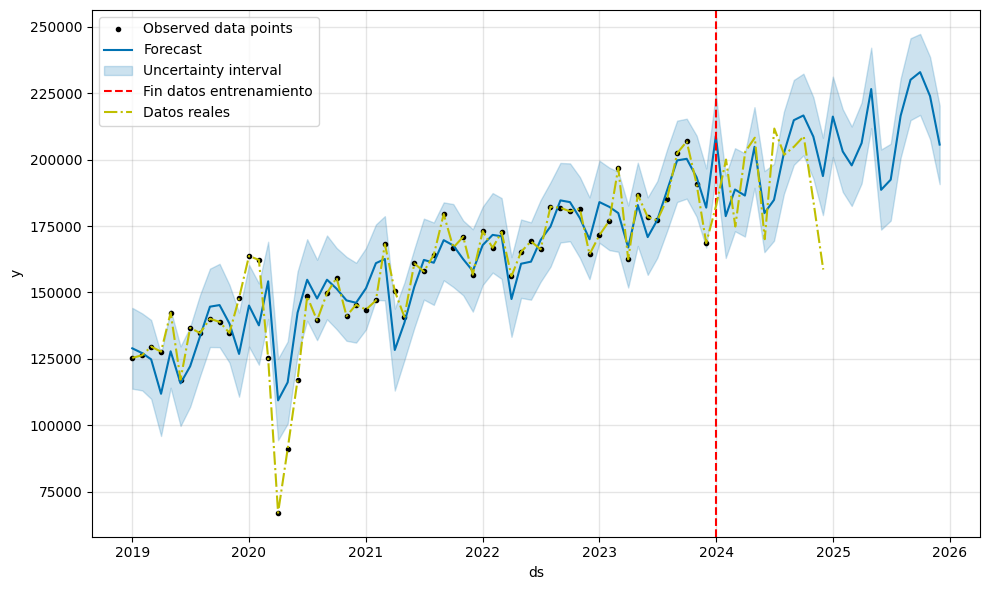

In [ ]:
from prophet import Prophet

df_prophet = monthly_counts.reset_index()
df_prophet.columns = ['ds', 'y']

model = Prophet()
model.fit(df_prophet[:-12])
future = model.make_future_dataframe(periods=24, freq='ME')
forecast = model.predict(future)

forecast_plot = model.plot(forecast)

axes = forecast_plot.gca()
last_training_date = forecast['ds'].iloc[-24]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Fin datos entrenamiento')

plt.plot(df_prophet['ds'], df_prophet['y'], 'y-.', label='Datos reales')

plt.legend()

### **Random Forest**

MAE: 17299.886666666665


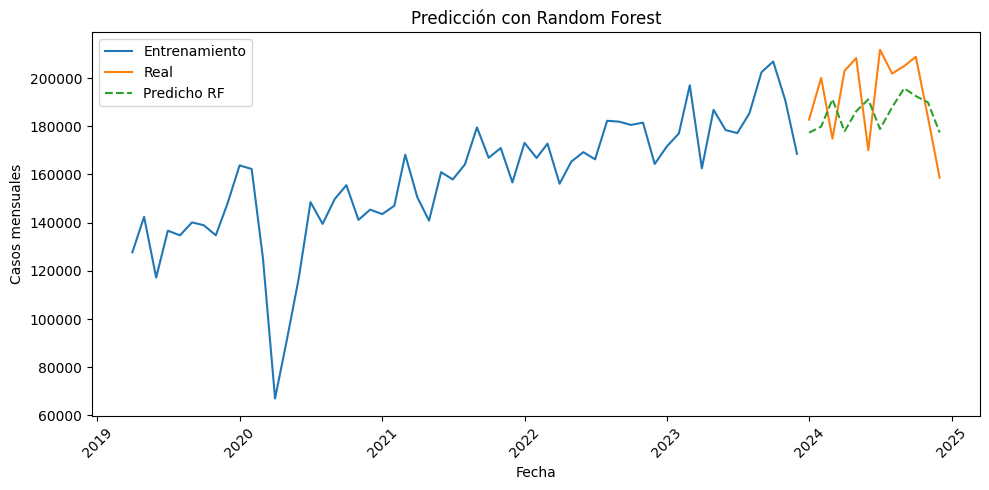

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Agrupar por mes
df['year_month'] = df['FECHA_PROCESO'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size().rename("Cantidad")
monthly_counts.index = monthly_counts.index.to_timestamp()
monthly_df = monthly_counts.reset_index().rename(columns={'year_month': 'ds', 'Cantidad': 'y'})

# Crear variables predictoras
monthly_df['month'] = monthly_df['ds'].dt.month
monthly_df['year'] = monthly_df['ds'].dt.year
monthly_df['lag1'] = monthly_df['y'].shift(1)
monthly_df['lag2'] = monthly_df['y'].shift(2)
monthly_df['lag3'] = monthly_df['y'].shift(3)

monthly_df.dropna(inplace=True)

train = monthly_df[monthly_df['ds'] < "2024-01-01"]
test = monthly_df[monthly_df['ds'] >= "2024-01-01"]

X_train = train[['month', 'year', 'lag1', 'lag2', 'lag3']]
y_train = train['y']
X_test = test[['month', 'year', 'lag1', 'lag2', 'lag3']]
y_test = test['y']

# Entrenar el modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_rf.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], y_train, label='Entrenamiento')
plt.plot(test['ds'], y_test, label='Real')
plt.plot(test['ds'], y_pred, label='Predicho RF', linestyle='--')
plt.title("Predicción con Random Forest")
plt.xlabel("Fecha")
plt.ylabel("Casos mensuales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **XGBoost**

In [ ]:
!pip install xgboost

MAE (XGBoost): 16576.787109375


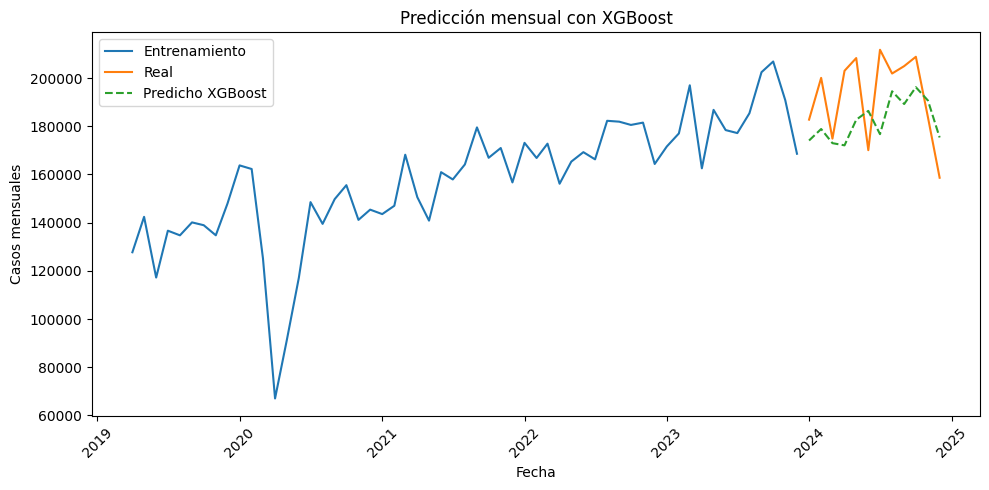

In [ ]:
from xgboost import XGBRegressor

# Modelo XGBoost
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_xgb.fit(X_train, y_train)

# Predicción
y_pred = model_xgb.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (XGBoost): {mae}")

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], y_train, label='Entrenamiento')
plt.plot(test['ds'], y_test, label='Real')
plt.plot(test['ds'], y_pred, label='Predicho XGBoost', linestyle='--')
plt.title("Predicción mensual con XGBoost")
plt.xlabel("Fecha")
plt.ylabel("Casos mensuales")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Crear una columna que representa el primer día del mes
df['FECHA_MES'] = df['FECHA_PROCESO'].dt.to_period('M').dt.to_timestamp()

# Agrupar por mes y contar ocurrencias
df_mensual = df.groupby('FECHA_MES').size().reset_index(name='conteo')

MAE Random Forest: 40150.92


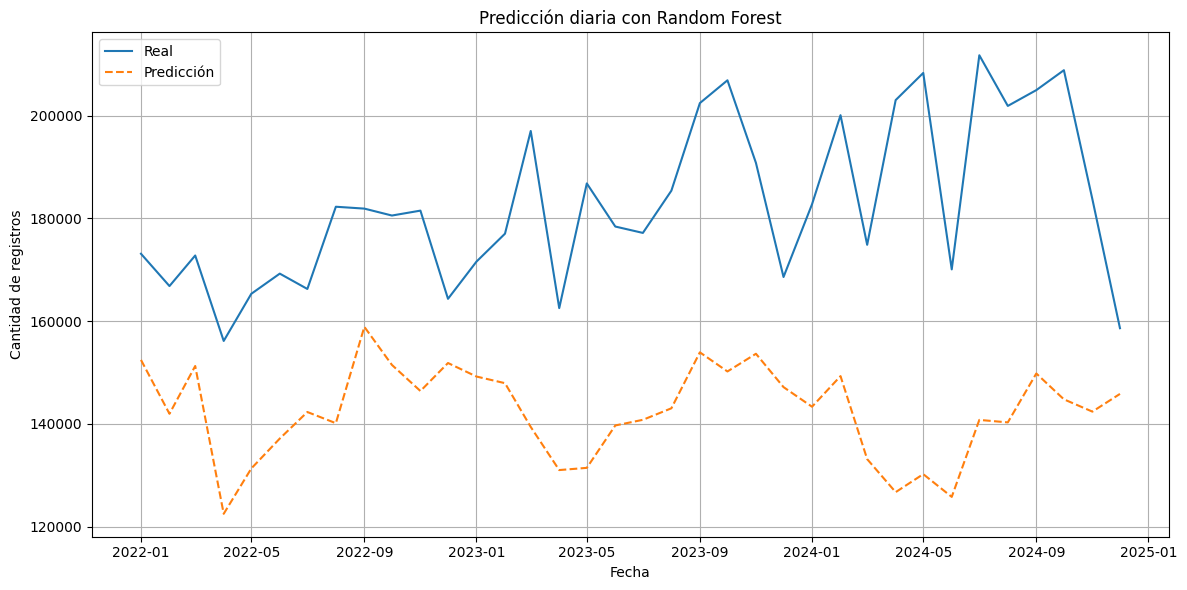

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Suponemos que df_diario tiene columnas: FECHA_DIA (datetime) y conteo (int)
df_mensual['FECHA_MES'] = pd.to_datetime(df_mensual['FECHA_MES'])

# Crear features desde la fecha
df_mensual['dia_semana'] = df_mensual['FECHA_MES'].dt.weekday
df_mensual['mes'] = df_mensual['FECHA_MES'].dt.month
df_mensual['dia_mes'] = df_mensual['FECHA_MES'].dt.day
df_mensual['fin_de_semana'] = df_mensual['dia_semana'].isin([5, 6]).astype(int)

# Separar variables y objetivo
X = df_mensual[['dia_semana', 'mes', 'dia_mes', 'fin_de_semana']]
y = df_mensual['conteo']

# Separar entrenamiento y prueba (últimos 30 días para prueba)
X_train, X_test = X[:-36], X[-36:]
y_train, y_test = y[:-36], y[-36:]
fechas_test = df_mensual['FECHA_MES'][-36:]

# Entrenar modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predecir
y_pred = modelo.predict(X_test)

# Evaluar
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE Random Forest: {mae:.2f}")

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(fechas_test, y_test.values, label='Real')
plt.plot(fechas_test, y_pred, label='Predicción', linestyle='--')
plt.title('Predicción diaria con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


MAE XGBoost: 41108.49


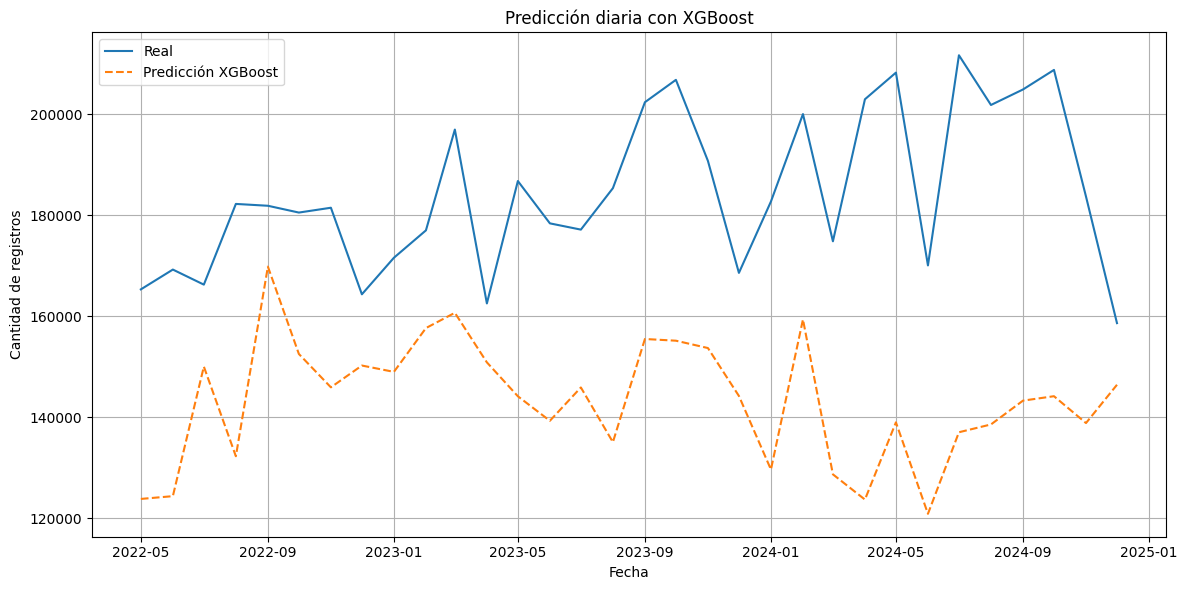

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# === Crear features temporales ===
df_mensual['dia_semana'] = df_mensual['FECHA_MES'].dt.weekday
df_mensual['mes'] = df_mensual['FECHA_MES'].dt.month
df_mensual['dia_mes'] = df_mensual['FECHA_MES'].dt.day
df_mensual['fin_de_semana'] = df_mensual['dia_semana'].isin([5, 6]).astype(int)

# === Variables predictoras y objetivo ===
X = df_mensual[['dia_semana', 'mes', 'dia_mes', 'fin_de_semana']]
y = df_mensual['conteo']

# === Separar entrenamiento y prueba ===
X_train, X_test = X[:-32], X[-32:]
y_train, y_test = y[:-32], y[-32:]
fechas_test = df_mensual['FECHA_MES'][-32:]

# === Entrenar modelo XGBoost ===
modelo = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
modelo.fit(X_train, y_train)

# === Predecir y evaluar ===
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE XGBoost: {mae:.2f}")

# === Graficar resultado ===
plt.figure(figsize=(12, 6))
plt.plot(fechas_test, y_test.values, label='Real')
plt.plot(fechas_test, y_pred, label='Predicción XGBoost', linestyle='--')
plt.title('Predicción diaria con XGBoost')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de registros')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## Conclusiones

Este proyecto nos permitió adentrarnos en el desafío de predecir la demanda de servicios de salud laboral en Colombia a partir de datos históricos reales. A través del uso de diferentes modelos estadísticos y de machine learning, no solo evaluamos el desempeño de cada enfoque, sino que también fortalecimos nuestra capacidad de análisis y toma de decisiones basada en datos.

Entre los hallazgos más relevantes:

- **Prophet** fue el modelo que mejor se ajustó a la serie temporal, logrando capturar tanto la tendencia como la estacionalidad de la demanda. Su capacidad para manejar eventos atípicos y su intervalo de incertidumbre lo convierten en una opción sólida para escenarios operativos reales.
- **Modelos como ARIMA, Gradient Boosting y Random Forest** mostraron limitaciones para capturar la complejidad temporal y los picos de la serie, aunque permitieron explorar aproximaciones complementarias desde lo clásico y lo no lineal.
- **SARIMAX** abrió la puerta a considerar factores externos que podrían estar influyendo en la demanda, aunque su efectividad dependerá de la calidad de los datos adicionales que se integren.
- En todos los casos, la calidad del pronóstico mejora cuando se entienden no solo las métricas, sino también el comportamiento del sistema que se está modelando.

Este ejercicio no fue solo técnico: nos permitió pensar en cómo traducir un análisis predictivo en acciones concretas que puedan ser útiles para una organización como SURA. Con una implementación adecuada, este tipo de modelos podría usarse para optimizar recursos, anticipar picos de demanda, diseñar estrategias de prevención por diagnóstico frecuente, y personalizar los servicios a nivel territorial.

Nuestra propuesta va más allá del modelo: es una invitación a usar los datos para anticiparse, planear mejor y cuidar más eficientemente la salud de quienes día a día mueven el país.
